$$\Huge \mathbf{\text{Example handwritten }} $$
$$\Huge \mathbf{\text{ digits recognization}} $$

# THE MNIST DATABASE

> A training set of 60,000 examples

> A test set of 10,000 examples

> reff: http://yann.lecun.com/exdb/mnist/

# Data structure

## Load library

In [4]:
import pickle
import gzip
f = gzip.open('data/mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
f.close()


In [22]:
#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

```python
#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e
```

In [23]:
# %load image.py
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


def show_imgs(i, j, data):
    imgs = []
    y = []
    for index in range(i, j + 1):
        img = data[0][index:index + 1]
        y.append(data[1][index:index + 1][0])
        img = np.reshape(img, (28, 28))
        if index == i:
            imgs = img
        else:
            imgs = np.concatenate((imgs, img), axis=1)

    plt.imshow(imgs, cmap='gray')
    print(y)
    plt.show()


def show_img(img):
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()


```python
# %load image.py
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


def show_imgs(i, j, data):
    imgs = []
    y = []
    for index in range(i, j + 1):
        img = data[0][index:index + 1]
        y.append(data[1][index:index + 1][0])
        img = np.reshape(img, (28, 28))
        if index == i:
            imgs = img
        else:
            imgs = np.concatenate((imgs, img), axis=1)

    plt.imshow(imgs, cmap='gray')
    print(y)
    plt.show()


def show_img(img):
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()
```

## Load data

In [24]:
training_data, validation_data, test_data = load_data()

In [25]:
print (np.shape(training_data[0]))

(50000, 784)


In [26]:
x = training_data[0][0:1]
y = training_data[1][0:1]
print(np.shape(x))
print(y)

(1, 784)
[5]


[3, 5, 3, 6, 1, 7, 2, 8, 6, 9]


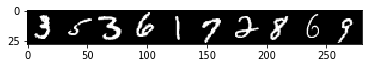

In [27]:
#Show image 
%matplotlib inline
show_imgs(10,19, training_data)

# Training network

(784, 1)
[5]


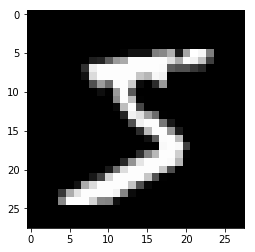

In [28]:
def get_input(i):
    training_input = np.reshape(training_data[0][i:i+1], (784, 1)) 
    y = training_data[1][i:i+1]
    return training_input, y

x, y = get_input(0) 
print(np.shape(x))
print(y)
show_img(x)

In [ ]:
## Load data to training

In [30]:
training_data_w, validation_data_w, test_data_w = load_data_wrapper()

[1, 1, 8, 3, 6, 1, 0, 3, 1, 0]


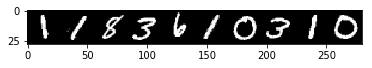

In [33]:
show_imgs(200,209, training_data)

In [35]:
# Predict
def predict(i):
    x, y_ = get_input(i)
    z, a = net.feedforward1(x)
    y = np.argmax(a[-1])
    return y, y_


In [36]:
y, y_  = predict(108)
print("Predict: ", y)
print("Actual: ", y_[0])

Predict:  0
Actual:  0
